# Clustering

We now perform k-means clustering on our dataset to identify similar countries (based on their cultural and political characteristics)

In [36]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

WGI_HOFSTEDE_CLEANSED = r"../03. Cleansed Data/wgi_hofstede.csv"



In [9]:
wgi_hofstede = pd.read_csv(WGI_HOFSTEDE_CLEANSED, index_col=[1,5])
wgi_hofstede = wgi_hofstede.drop('Unnamed: 0', axis=1)
wgi_hofstede

,,pdi,uai,ltowvs,VoiceandAccountability,Political StabilityNoViolence,GovernmentEffectiveness,RegulatoryQuality,RuleofLaw,ControlofCorruption
country,ctr_y,,,,,,,,,
argentina,ARG,49.0,86.0,20.403023,0.600435,-0.119978,-0.086486,-0.492753,-0.430726,-0.071071
australia,AUS,38.0,51.0,21.158690,1.315125,1.086503,1.571896,1.873539,1.734145,1.811107
austria,AUT,11.0,70.0,60.453401,1.326599,0.980123,1.490911,1.459116,1.883051,1.545429
bangladesh,BGD,80.0,60.0,47.103275,-0.721775,-0.918173,-0.739230,-0.928954,-0.636308,-0.993810
belgium,BEL,65.0,94.0,81.863980,1.369120,0.481186,1.032227,1.290999,1.363715,1.551961
...,...,...,...,...,...,...,...,...,...,...
sudan,SDN,80.0,68.0,23.000000,-1.635968,-1.673614,-1.621905,-1.673834,-1.140473,-1.366985
syrian arab republic,SYR,80.0,68.0,23.000000,-1.979875,-2.727996,-1.711279,-1.757903,-2.076063,-1.688553
tunisia,TUN,80.0,68.0,23.000000,0.281406,-0.832536,-0.102274,-0.437205,0.062219,-0.077050


In [3]:
profile = ProfileReport(wgi_hofstede)
profile.to_widgets()

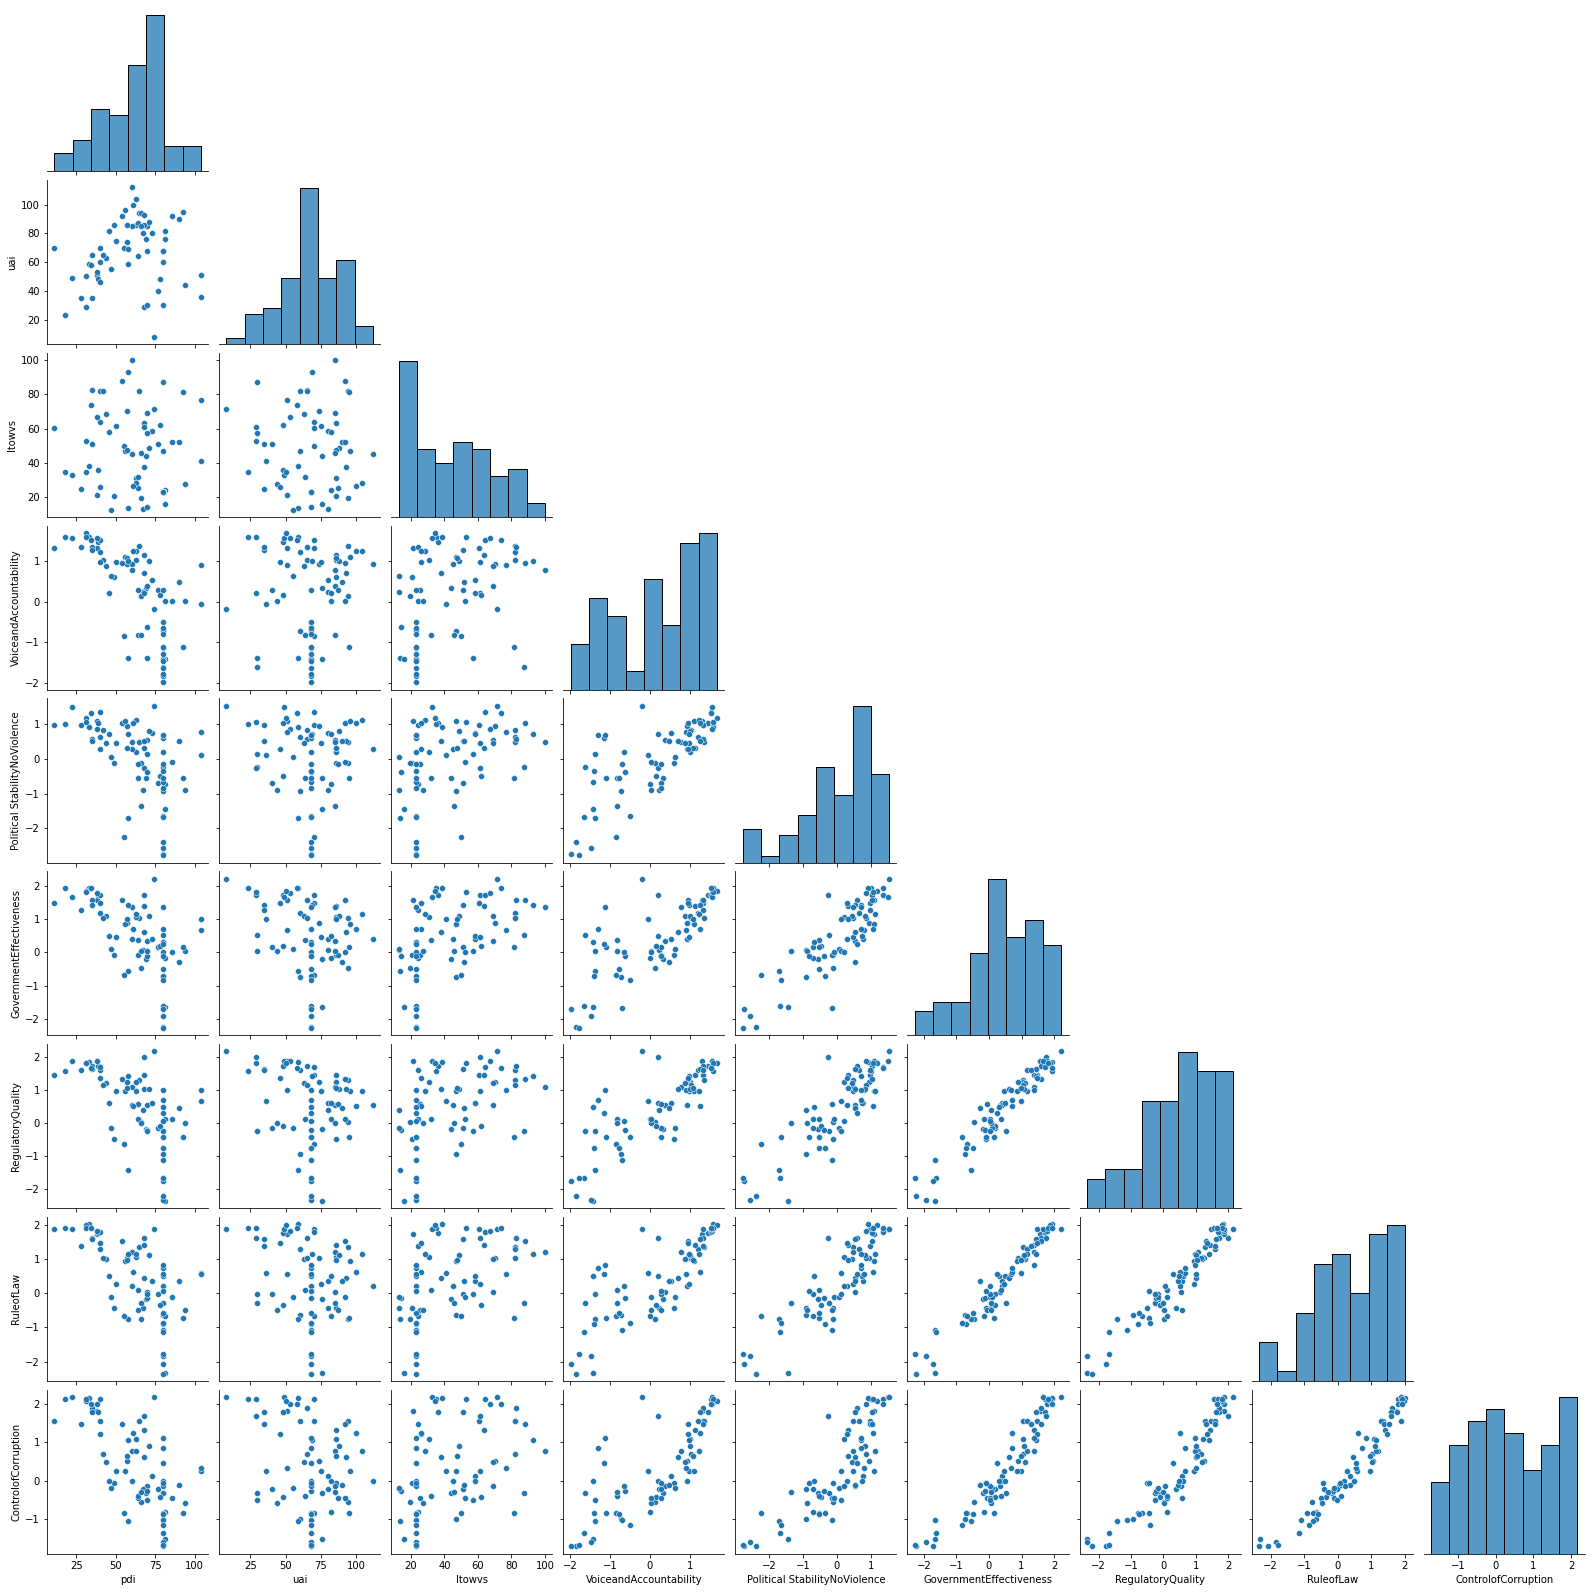

In [6]:
sns.pairplot(wgi_hofstede, corner=True)

<AxesSubplot:>

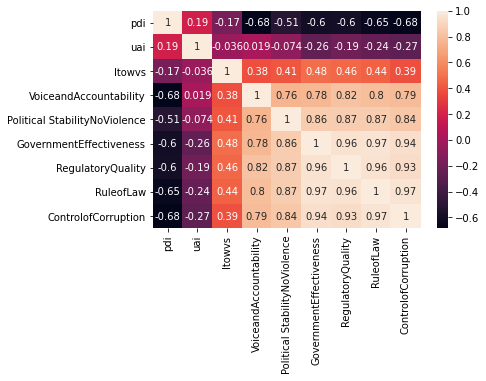

In [5]:
var_corr = wgi_hofstede.corr()
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True)

We note that pdi is strongly negatively correlated with all WGI indicators, and all the WGI indicators are strongly correlated with each other. We will perform principal component analysis to deal with this, using the uai and ltowvs as is (since they have low correlation) and perform PCA on pdi and the WGI columns.



In [45]:
uai_ltowvs = wgi_hofstede[['uai', 'ltowvs']]
high_corr_features = wgi_hofstede[list(set(wgi_hofstede.columns) - set(uai_ltowvs.columns))]

In [46]:
high_corr_features.head()

,,RuleofLaw,VoiceandAccountability,pdi,ControlofCorruption,GovernmentEffectiveness,RegulatoryQuality,Political StabilityNoViolence
country,ctr_y,,,,,,,
argentina,ARG,-0.430726,0.600435,49.0,-0.071071,-0.086486,-0.492753,-0.119978
australia,AUS,1.734145,1.315125,38.0,1.811107,1.571896,1.873539,1.086503
austria,AUT,1.883051,1.326599,11.0,1.545429,1.490911,1.459116,0.980123
bangladesh,BGD,-0.636308,-0.721775,80.0,-0.993810,-0.739230,-0.928954,-0.918173
belgium,BEL,1.363715,1.369120,65.0,1.551961,1.032227,1.290999,0.481186


In [85]:
# standardise features
high_corr_features_std = pd.DataFrame(StandardScaler().fit_transform(high_corr_features), columns=high_corr_features.columns, index=high_corr_features.index)
# create pca 
pca = PCA(n_components=4)
reduced = pca.fit_transform(high_corr_features_std)
# Plot the explained variances
features = range(pca.n_components_)
PCA_components = pd.DataFrame(reduced)

In [86]:
pd.DataFrame(pca.components_,columns=high_corr_features_std.columns,index = ['PC-0','PC-1', 'PC-2', 'PC-3'])

,RuleofLaw,VoiceandAccountability,pdi,ControlofCorruption,GovernmentEffectiveness,RegulatoryQuality,Political StabilityNoViolence
PC-0,-0.404039,-0.363262,0.298687,-0.400001,-0.397784,-0.399596,-0.371039
PC-1,0.122872,-0.212910,0.873835,0.039030,0.201669,0.195763,0.308976
PC-2,0.228407,-0.816347,-0.218384,0.287013,0.260271,0.063465,-0.282082
PC-3,0.105501,0.360716,0.268347,0.131704,0.163102,0.240315,-0.827674


([<matplotlib.axis.XTick at 0x7f8cc3cb9668>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

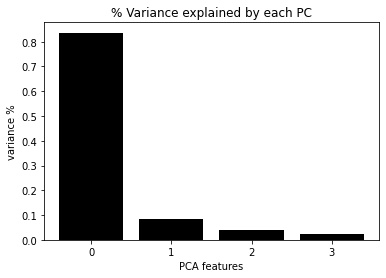

In [95]:
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.title('% Variance explained by each PC')
plt.xticks(features)

From the above graph, we see that ~90% of the variance is explained by the first principal component, and the next 5% by the second. So we will use the first two.

Text(0, 0.5, 'PCA 1')

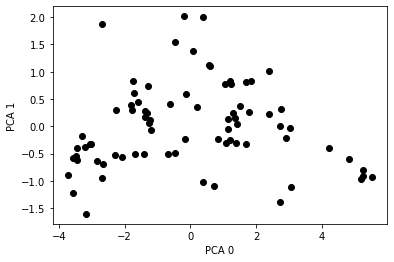

In [94]:
plt.scatter(PCA_components[0], PCA_components[1], color='black')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')

We combine the PCA components back with the rest of the data and do kmeans clustering

In [96]:
PCA_components

,0,1,2,3
0,0.734554,-1.100873,-0.560750,-0.349282
1,-3.034204,-0.321525,0.149984,-0.027353
2,-3.178483,-1.603410,0.380942,-0.415778
3,2.732741,0.007953,-0.130622,-0.066955
4,-1.798153,0.398463,-0.324995,0.559597
...,...,...,...,...
72,4.228582,-0.402903,0.316591,-0.158347
73,5.242891,-0.796161,0.565598,0.411600
74,1.365220,0.150141,-0.358136,0.580909
75,-0.476643,1.545790,1.198975,-0.376935


In [97]:
PCA_components[[0,1]]

,0,1
0,0.734554,-1.100873
1,-3.034204,-0.321525
2,-3.178483,-1.603410
3,2.732741,0.007953
4,-1.798153,0.398463
...,...,...
72,4.228582,-0.402903
73,5.242891,-0.796161
74,1.365220,0.150141
75,-0.476643,1.545790


In [101]:
pca_1_2 = pd.DataFrame(PCA_components[[0,1]])
pca_1_2.columns = ['PCA-1', 'PCA-2']
pca_1_2.index = high_corr_features.index
pca_1_2.head()

,,PCA-1,PCA-2
country,ctr_y,,
argentina,ARG,0.734554,-1.100873
australia,AUS,-3.034204,-0.321525
austria,AUT,-3.178483,-1.603410
bangladesh,BGD,2.732741,0.007953
belgium,BEL,-1.798153,0.398463


In [104]:

pca_dataset = pd.concat([uai_ltowvs, pca_1_2], axis=1)
pca_dataset.head()

,,uai,ltowvs,PCA-1,PCA-2
country,ctr_y,,,,
argentina,ARG,86.0,20.403023,0.734554,-1.100873
australia,AUS,51.0,21.158690,-3.034204,-0.321525
austria,AUT,70.0,60.453401,-3.178483,-1.603410
bangladesh,BGD,60.0,47.103275,2.732741,0.007953
belgium,BEL,94.0,81.863980,-1.798153,0.398463


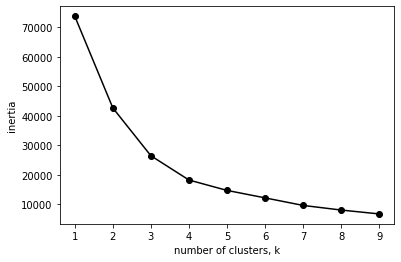

In [105]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(pca_dataset)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The Elbow method is looking at the elbow point of the above graph (i.e. when rate of change in inertia appears to slow to an insignificant level) and picking that point as the number of clusters. We therefore pick 4 clusters as the optimal number of clusters.


In [109]:
# todo: visualise clusters and come to conclusions re: responses + effectiveness.